In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import atest version of your merged project data set 
path_merge = r'/Users/janekobtseva/19-09-2024 Instacart Basket Analysis/02 Data/Prepared Data/merge_4_9.pkl'

In [5]:
df_merge = pd.read_pickle(os.path.join(path_merge))

In [6]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32406041 entries, 0 to 32406040
Data columns (total 33 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   product_id                      int64  
 2   product_name                    object 
 3   aisle_id                        int64  
 4   department_id                   int64  
 5   prices                          float64
 6   order_id                        int64  
 7   user_id                         int64  
 8   eval_set                        object 
 9   order_number                    int64  
 10  order_day_of_week               int64  
 11  order_hour_of_day               int64  
 12  days_since_prior_order          float64
 13  add_to_cart_order               int64  
 14  reordered                       int64  
 15  price_range_loc                 object 
 16  Busiest day                     object 
 17  busiest_days_flag        

In [7]:
#Consider any security implications that might exist for this new data. 
#You’ll need to address any PII data in the data before continuing your analysis.

#Not anymore, as I have deleted First and Second names, as we have user_id
#Maybe we still need it, as we have "State", and it is part of the address. But I believe it is to general still for PII

In [8]:
#Create a regional segmentation of the data. create a “Region” column based on the “State”

df_merge.loc[(df_merge['state'] == 'Maine')|
(df_merge['state'] == 'New Hampshire')|
(df_merge['state'] == 'Vermont')|
(df_merge['state'] == 'Massachusetts')|
(df_merge['state'] == 'Rhode Island')|
(df_merge['state'] == 'Connecticut')|
(df_merge['state'] == 'New York')|
(df_merge['state'] == 'Pennsylvania')| 
(df_merge['state'] == 'New Jersey'), 'Region'] = 'Northeast'

In [9]:
df_merge.loc[(df_merge['state'] == 'Wisconsin')|
(df_merge['state'] == 'Michigan')|
(df_merge['state'] == 'Illinois')|
(df_merge['state'] == 'Indiana')|
(df_merge['state'] == 'Ohio')|
(df_merge['state'] == 'North Dakota')|
(df_merge['state'] == 'South Dakota')|
(df_merge['state'] == 'Nebraska')| 
(df_merge['state'] == 'Kansas')|
(df_merge['state'] == 'Minnesota')|
(df_merge['state'] == 'Iowa')| 
(df_merge['state'] == 'Missouri'), 'Region'] = 'Midwest'

In [10]:
df_merge.loc[(df_merge['state'] == 'Delaware')| 
(df_merge['state'] == 'Maryland')|
(df_merge['state'] == 'District of Columbia')|
(df_merge['state'] == 'Virginia')|
(df_merge['state'] == 'West Virginia')|
(df_merge['state'] == 'North Carolina')|
(df_merge['state'] == 'South Carolina')|
(df_merge['state'] == 'Georgia')| 
(df_merge['state'] == 'Florida')|
(df_merge['state'] == 'Kentucky')|
(df_merge['state'] == 'Tennessee')| 
(df_merge['state'] == 'Mississippi')|
(df_merge['state'] == 'Alabama')|
(df_merge['state'] == 'Oklahoma')| 
(df_merge['state'] == 'Texas') |
(df_merge['state'] == 'Arkansas') |
(df_merge['state'] == 'Louisiana'), 'Region'] = 'South'

In [11]:
df_merge.loc[(df_merge['state'] == 'Idaho') | 
(df_merge['state'] == 'Montana')|  
(df_merge['state'] == 'Wyoming')|
(df_merge['state'] == 'Nevada')|
(df_merge['state'] == 'Utah')|
(df_merge['state'] == 'Colorado')|
(df_merge['state'] == 'Arizona')|
(df_merge['state'] == 'New Mexico')| 
(df_merge['state'] == 'Alaska')|
(df_merge['state'] == 'Washington')|
(df_merge['state'] == 'Oregon')|
(df_merge['state'] == 'California')|
(df_merge['state'] == 'Hawaii'), 'Region'] = 'West'

In [12]:
df_merge['Region'].value_counts(dropna=False)

Region
South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: count, dtype: int64

In [13]:
#Determine whether there’s a difference in spending habits between the different U.S. regions. 
#(Hint: You can do this by crossing the variable you just created with the spending flag.)

crosstab = pd.crosstab(df_merge['Region'], df_merge['Spending_flag'], dropna = False)

In [14]:
crosstab

#Even though, South region shows the biggest number of spenders
#Midwest and West have similar distribution among low and High spenders
#Northest shows the smallest number of spenders

Spending_flag,High spender,Low spender
Region,,
Midwest,155979,7441606
Northeast,108226,5614713
South,209693,10582607
West,160354,8132863


In [15]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32406041 entries, 0 to 32406040
Data columns (total 34 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   product_id                      int64  
 2   product_name                    object 
 3   aisle_id                        int64  
 4   department_id                   int64  
 5   prices                          float64
 6   order_id                        int64  
 7   user_id                         int64  
 8   eval_set                        object 
 9   order_number                    int64  
 10  order_day_of_week               int64  
 11  order_hour_of_day               int64  
 12  days_since_prior_order          float64
 13  add_to_cart_order               int64  
 14  reordered                       int64  
 15  price_range_loc                 object 
 16  Busiest day                     object 
 17  busiest_days_flag        

In [16]:
df_merge.shape

(32406041, 34)

In [17]:
#Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
#Make sure you export this sample.

df_high_activity_customers = df_merge.drop(df_merge[df_merge.order_number < 5].index)

In [18]:
df_high_activity_customers.shape

(24415721, 34)

In [19]:
#Export file in pickle format as ords_prods_merge_new_variable.pkl

path_prepared_data = r'/Users/janekobtseva/19-09-2024 Instacart Basket Analysis/02 Data/Prepared Data'

In [20]:
df_high_activity_customers.to_pickle(os.path.join(path_prepared_data, 'high_activity_customers_4.10.pkl'))

In [21]:
#Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
#You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 
#Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”

In [25]:
df_merge.loc[(df_merge['age'] <= 30 )&
(df_merge['income'] <= 30000 )&
(df_merge['n_dependants'] == 0)&
(df_merge['department_id'] == 1)|
(df_merge['department_id'] == 7), 'profiling_variable_1' ] = 'Student'

In [26]:
df_merge.loc[(df_merge['age'] >= 30 )&
(df_merge['income'] <= 60000)&
(df_merge['n_dependants'] == 0)&
(df_merge['department_id'] == 12)|
(df_merge['department_id'] == 5),'profiling_variable_1'] = 'Single Adult'

In [27]:
df_merge.loc[(df_merge['age'] <= 30 )&
(df_merge['income'] <= 60000)&
(df_merge['n_dependants'] >= 1)&
(df_merge['department_id'] == 18)|
(df_merge['department_id'] == 15), 'profiling_variable_1'] = 'Yong Parent'

In [28]:
profiling_variable=df_merge['profiling_variable_1'].value_counts(dropna=False)

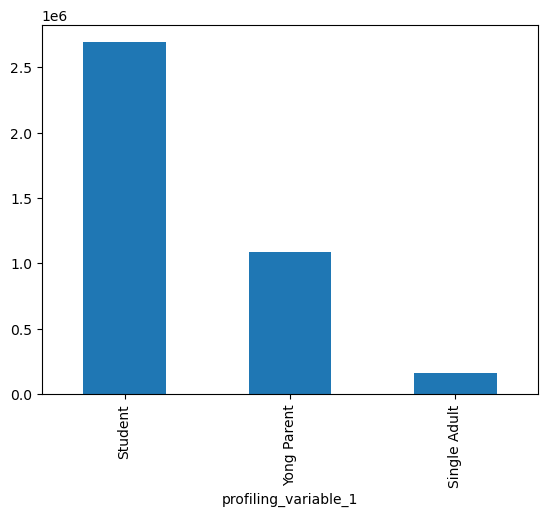

In [29]:
#visualization to show the distribution of profiles.

bar_1 = df_merge['profiling_variable_1'].value_counts().plot.bar()

In [30]:
#Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_merge.groupby('profiling_variable_1').agg({'prices': ['mean', 'min', 'max']})

prices           
                          mean  min   max
profiling_variable_1                     
Single Adult          8.711352  1.0  25.0
Student               7.680101  1.0  15.0
Yong Parent           7.540768  1.0  15.0

In [31]:
df_merge.groupby('profiling_variable_1').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                       mean  min   max
profiling_variable_1                                  
Single Adult                      10.466239  0.0  30.0
Student                           11.054743  0.0  30.0
Yong Parent                       11.636825  0.0  30.0

In [53]:
#Compare your customer profiles with regions and departments. Can you identify a link between them? 
#Customers may demonstrate different behaviors across regions, which could make this information important.
crosstab12 = pd.crosstab(df_merge['Region'], df_merge['profiling_variable_1'], dropna = False)

In [54]:
crosstab12

profiling_variable_1,Single Adult,Student,Yong Parent,NaN
Region,,,,
Midwest,39137,625796,255463,6677189
Northeast,28743,483796,189476,5020924
South,55855,899547,362096,9474802
West,42879,680810,278750,7290778


<Axes: xlabel='department_id', ylabel='profiling_variable_1'>

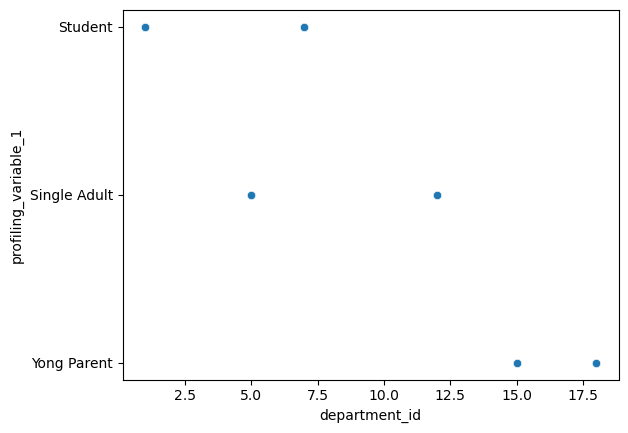

In [77]:
sns.scatterplot(x = 'department_id', y = 'profiling_variable_1',data = df_merge)

In [51]:
path_visualizations = r'/Users/janekobtseva/19-09-2024 Instacart Basket Analysis/04 Analysis/Visualizations'

In [53]:
bar_1.figure.savefig(os.path.join(path_visualizations, 'distribution_of_profiles..png'))

In [55]:
#Export file in pickle format as ords_prods_merge_new_variable.pkl

path_prepared_data = r'/Users/janekobtseva/19-09-2024 Instacart Basket Analysis/02 Data/Prepared Data'

In [57]:
df_merge.to_pickle(os.path.join(path_prepared_data, 'df_10.pkl'))